In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [16]:
train_data = pd.read_csv('data/wookiee-train.csv', index_col=0)
test_data = pd.read_csv('data/wookiee-test.csv', index_col=0)
hold_data = pd.read_csv('data/wookiee-ho.csv', index_col=0)

In [17]:
train_data.head()

,wookieecolor,xcoord,ycoord,zcoord
0,red,-3.410692,0.854400,0.228154
1,red,0.350080,-0.751120,-1.845183
2,chartreuse,0.841712,-0.058204,0.246217
3,red,-0.646260,-1.821082,0.444616
4,blue,1.423538,2.269409,-1.061053


In [48]:
train_X = train_data[coords]

In [49]:
train_y = train_data['wookieecolor']

In [18]:
test_data.head()

,wookieecolor,xcoord,ycoord,zcoord
0,chartreuse,-0.500883,3.642656,-0.332794
1,blue,-0.697365,0.391459,0.913703
2,red,-0.653677,-1.676559,0.462973
3,white,-0.843060,0.856792,0.425849
4,red,-0.939812,0.182101,-1.452490


In [50]:
test_X = test_data[coords]

In [51]:
test_y = test_data['wookieecolor']

In [19]:
hold_data.head()

,xcoord,ycoord,zcoord
0,-0.420177,-0.403701,-1.367733
1,-1.552317,1.851824,-0.430991
2,-0.554652,0.138217,-0.185971
3,-0.431224,0.007767,0.899117
4,0.549926,-1.030384,0.799581


# Train Model

## Functions

In [142]:
# caclualate euclidean distance between two points

def euc_dist(coord1, coord2):
    
    diff_sqr = 0
    
    for i in range(len(coord1)):
        diff_sqr += (coord1[i] - coord2[i])**2
    
    distance = np.sqrt(diff_sqr)
    
    return(distance)

In [144]:
def knn_classify(X_train, y_train, coords, test_pts, k):
    
    test_labels = []
    
    for test_pt in test_pts.values:
        
        # initialize dataframe to store distance and labels of training observations
        knn_df = pd.DataFrame(columns=['distance', 'label'])
        # calculate distance to all training ovservations
        knn_df['distance'] = X_train.apply(lambda x: euc_dist(test_pt, x[coords]), axis=1)
        # input all training labels
        knn_df['label'] = y_train
        # sort dataframe by closest distance to training observations
        knn_df.sort_values(by='distance', inplace=True)
        # select most frequent label in k observations
        test_labels.append(knn_df.iloc[0:k, :]['label'].mode()[0])
    
    return(test_labels)

## Test Model

In [33]:
coords = ['xcoord', 'ycoord', 'zcoord']

In [150]:
test_predicts = knn_classify(train_X, train_y, coords, test_X, 1)

In [154]:
sum(test_predicts == test_y) / len(test_y)

0.688

In [172]:
k_num = 5

In [173]:
acc = []

for k in range(k_num):
    test_predicts = knn_classify(train_X, train_y, coords, test_X, k + 1)
    acc.append(sum(test_predicts == test_y) / len(test_y) * 100)

Text(0.5,0,'k-value')

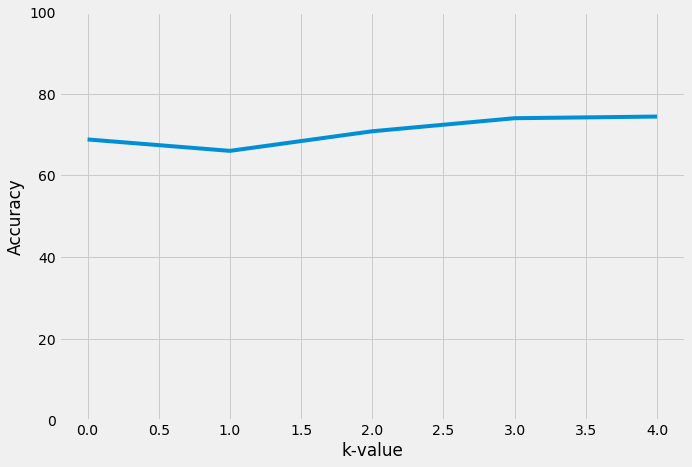

In [180]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(k_num), acc)
ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy')
ax.set_xlabel('k-value')

## Model Predictions

In [181]:
test_predicts = knn_classify(train_X, train_y, coords, hold_data, 3)

In [182]:
test_predicts

['blue',
 'blue',
 'blue',
 'red',
 'white',
 'white',
 'blue',
 'red',
 'red',
 'red',
 'white',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'blue',
 'white',
 'red',
 'red',
 'red',
 'white',
 'red',
 'white',
 'blue',
 'red',
 'white',
 'red',
 'red',
 'white',
 'white',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'white',
 'white',
 'red',
 'chartreuse',
 'red',
 'red',
 'red',
 'red',
 'white',
 'blue',
 'chartreuse',
 'red',
 'chartreuse',
 'white',
 'white',
 'red',
 'red',
 'white',
 'red',
 'white',
 'red',
 'red',
 'red',
 'chartreuse',
 'white',
 'red',
 'blue',
 'red',
 'blue',
 'chartreuse',
 'white',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'white',
 'white',
 'red',
 'white',
 'chartreuse',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'white',
 'white',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'white',
 'red',
 'white',
 'white',
 'red',
 'red',
 'red',
 'red',
 'red',
 'white',
 